In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Aggregation and Grouping

Data aggregation involves summarizing raw data to prepare it for statistical analysis. This often requires grouping data based on certain labels or indices to calculate aggregated metrics. In pandas, we use the `groupby` operation to perform such conditional aggregations efficiently.

**Table of contents:**

- [Using groupby](#1.-Using-groupby)
- [Unstacking](#2.-Unstacking)
- [Pivot tables and cross tabulations](#3.-Pivot-tables-and-cross-tabulations)
- [Rolling and resampling](#4.-Resampling-and-rolling)

## 1. Using groupby

A `groupby` operation involves three steps:

- **Split**: Divide the data into groups based on criteria.
    
- **Apply**: Apply a function to each group.
    
- **Combine**: Merge the results into a data structure.
    
For example, the figure below shows a groupby operation where the `apply` step performs a summation.

<img src="images/split-apply-combine.png" alt="drawing" width="700"/>

Let's see some concrete examples.

In [18]:
# load the drinks dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/drinks.csv'
df = pd.read_csv(path, index_col='country')
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


Let’s start with a simple task: calculating the average beer servings across the dataset. 
We can use pandas' built-in `mean` method for this.

In [10]:
df.beer_servings.mean()

106.16062176165804

Now, let’s calculate the average beer servings for countries in Africa. First, we filter the countries by continent and then apply the `mean` method.

In [11]:
df[df.continent=='Africa'].beer_servings.mean()

61.471698113207545

But what if we want to do this for every continent—Asia, Africa, Europe, North America, South America, and Oceania? Repeating the code for each continent would be time-consuming.
Instead, we can use the `groupby` method to group the data by the continent column and then apply the `mean` method to the `beer_servings` for each group.

In [12]:
df.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

<Axes: xlabel='continent'>

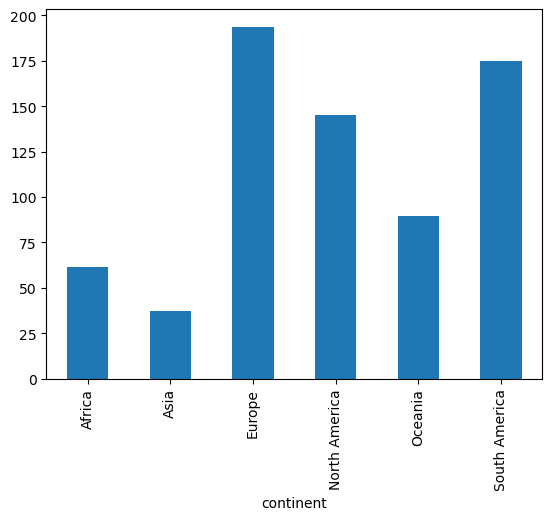

In [13]:
# For fun, here’s a bar plot of the average beer servings by continent
df.groupby('continent').beer_servings.mean().plot(kind='bar')

We can use other aggregation functions like `max`, `min`, `count`, `std`, and more with `groupby`.

In [14]:
df.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

We can also apply an aggregation function, such as `mean`, to every column within each group (e.g., each continent).

In [19]:
df.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


<Axes: xlabel='continent'>

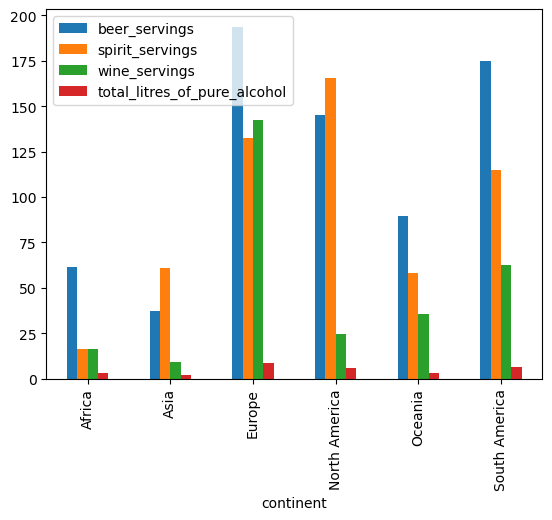

In [33]:
# For a fun comparison, here’s a side-by-side bar plot of the average values for each continent.
df.groupby('continent').mean().plot(kind='bar')

We can also use custom aggregation functions. 
For example, let’s create a function that calculates the difference between the maximum and minimum values.

In [20]:
def peak_to_peak(group):
    return group.max()-group.min()

Now, we group by continent and apply our `peak_to_peak` function.

In [22]:
df.groupby('continent').beer_servings.apply(peak_to_peak)

continent
Africa           376
Asia             247
Europe           361
North America    284
Oceania          306
South America    240
Name: beer_servings, dtype: int64

Here’s another example.
Suppose we want to get the data for the top 5 countries in each continent based on `wine_servings`.

In [24]:
# Function to select the top 5 countries with the highest wine servings per continent
def top5(group):
    return group.sort_values('wine_servings', ascending=False).head(5)

In [28]:
df.groupby('continent').apply(top5)

C:\Users\javier.perez-alvaro\AppData\Local\Temp\ipykernel_14944\4111780338.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('continent').apply(top5)


beer_servings  spirit_servings  \
continent     country                                               
Africa        Equatorial Guinea               92                0   
              Sao Tome & Principe             56               38   
              South Africa                   225               76   
              Gabon                          347               98   
              Seychelles                     157               25   
Asia          Laos                            62                0   
              Russian Federation             247              326   
              Turkmenistan                    19               71   
              Lebanon                         20               55   
              Syria                            5               35   
Europe        France                         127              151   
              Portugal                       194               67   
              Andorra                        245              138   
              Switzerland                    185              100   
              Denmark                        224               81   
North America Canada                         240              122   
              USA                            249              158   
              St. Lucia                      171              315   
              Bahamas                        122              176   
              Antigua & Barbuda              102              128   
Oceania       Australia                      261               72   
              New Zealand                    203               79   
              Cook Islands                     0              254   
              Samoa                          105               18   
              Palau                          306               63   
South America Argentina                      193               25   
              Uruguay                        115               35   
              Chile                          130              124   
              Paraguay                       213              117   
              Peru                           163              160   

                                   wine_servings  \
continent     country                              
Africa        Equatorial Guinea              233   
              Sao Tome & Principe            140   
              South Africa                    81   
              Gabon                           59   
              Seychelles                      51   
Asia          Laos                           123   
              Russian Federation              73   
              Turkmenistan                    32   
              Lebanon                         31   
              Syria                           16   
Europe        France                         370   
              Portugal                       339   
              Andorra                        312   
              Switzerland                    280   
              Denmark                        278   
North America Canada                         100   
              USA                             84   
              St. Lucia                       71   
              Bahamas                         51   
              Antigua & Barbuda               45   
Oceania       Australia                      212   
              New Zealand                    175   
              Cook Islands                    74   
              Samoa                           24   
              Palau                           23   
South America Argentina                      221   
              Uruguay                        220   
              Chile                          172   
              Paraguay                        74   
              Peru                            21   

                                   total_litres_of_pure_alcohol      continent  
continent     country                                                           

The code worked, but you saw a warning because pandas is changing how it handles the `apply` method with grouped data.

Currently, pandas includes the grouping column (like `continent`) in the results, but this will change in pandas 3.0. 
To avoid the warning, you can set the `include_groups` parameter to `False`. 
This will exclude the grouping columns and stop the warning from showing up.

In [30]:
df.groupby('continent').apply(top5, include_groups=False)

beer_servings  spirit_servings  \
continent     country                                               
Africa        Equatorial Guinea               92                0   
              Sao Tome & Principe             56               38   
              South Africa                   225               76   
              Gabon                          347               98   
              Seychelles                     157               25   
Asia          Laos                            62                0   
              Russian Federation             247              326   
              Turkmenistan                    19               71   
              Lebanon                         20               55   
              Syria                            5               35   
Europe        France                         127              151   
              Portugal                       194               67   
              Andorra                        245              138   
              Switzerland                    185              100   
              Denmark                        224               81   
North America Canada                         240              122   
              USA                            249              158   
              St. Lucia                      171              315   
              Bahamas                        122              176   
              Antigua & Barbuda              102              128   
Oceania       Australia                      261               72   
              New Zealand                    203               79   
              Cook Islands                     0              254   
              Samoa                          105               18   
              Palau                          306               63   
South America Argentina                      193               25   
              Uruguay                        115               35   
              Chile                          130              124   
              Paraguay                       213              117   
              Peru                           163              160   

                                   wine_servings  total_litres_of_pure_alcohol  
continent     country                                                           
Africa        Equatorial Guinea              233                           5.8  
              Sao Tome & Principe            140                           4.2  
              South Africa                    81                           8.2  
              Gabon                           59                           8.9  
              Seychelles                      51                           4.1  
Asia          Laos                           123                           6.2  
              Russian Federation              73                          11.5  
              Turkmenistan                    32                           2.2  
              Lebanon                         31                           1.9  
              Syria                           16                           1.0  
Europe        France                         370                          11.8  
              Portugal                       339                          11.0  
              Andorra                        312                          12.4  
              Switzerland                    280                          10.2  
              Denmark                        278                          10.4  
North America Canada                         100                           8.2  
              USA                             84                           8.7  
              St. Lucia                       71                          10.1  
              Bahamas                         51                           6.3  
              Antigua & Barbuda               45                           4.9  
Oceania       Australia                     

We can also apply multiple aggregation functions at the same time to each group.

In [32]:
df.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max', 'std', peak_to_peak])

,count,mean,min,max,std,peak_to_peak
continent,,,,,,
Africa,53,61.471698,0,376,80.557816,376
Asia,44,37.045455,0,247,49.469725,247
Europe,45,193.777778,0,361,99.631569,361
North America,23,145.434783,1,285,79.621163,284
Oceania,16,89.687500,0,306,96.641412,306
South America,12,175.083333,93,333,65.242845,240


## 2. Unstacking

When we group by multiple columns, pandas creates a DataFrame with a MultiIndex, which can be challenging to work with. Unstacking helps to reshape and simplify this MultiIndex, making the data easier to analyze and visualize.

In [34]:
# load tips dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/tips.csv'
df = pd.read_csv(path)
df

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [36]:
# add tip percentage of total bill
df['tip_pct'] = 100*df.tip/df.total_bill

Let’s say we want to find the average tip percentage, broken down by both day of the week and smoker status.

In [41]:
# aggregate tip_pct by day and smoker
df.groupby(['day','smoker']).tip_pct.mean()

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

We obtained a Series with a MultiIndex.
This means the index has multiple levels. 
In our case, the index has two levels: `day` and `smoker`.
We can "unstack" the MultiIndex to transform it into a DataFrame, where one level of the index becomes columns.
This makes it easier to work with and analyze the data.

In [43]:
# unstack `day`
df.groupby(['day','smoker']).tip_pct.mean().unstack(level=0)

day,Fri,Sat,Sun,Thur
smoker,,,,
No,15.165044,15.804766,16.011294,16.029808
Yes,17.478305,14.790607,18.725032,16.386327


In [44]:
# unstack `smoker`
df.groupby(['day','smoker']).tip_pct.mean().unstack(level=1)

smoker,No,Yes
day,,
Fri,15.165044,17.478305
Sat,15.804766,14.790607
Sun,16.011294,18.725032
Thur,16.029808,16.386327


Here's a fun example: we calculate the average tip percentage by day of the week and create side-by-side bar plots for smokers and non-smokers.

<Axes: xlabel='day'>

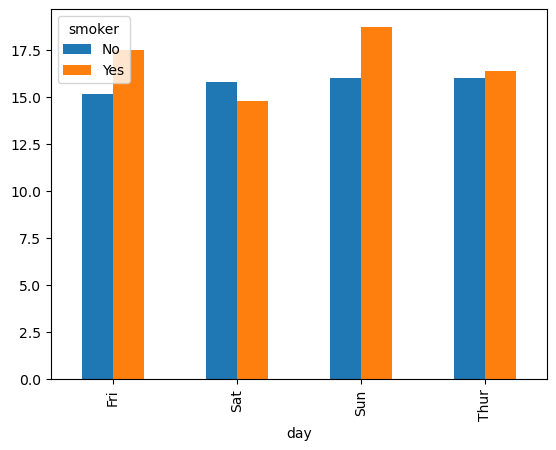

In [46]:
df.groupby(['day','smoker']).tip_pct.mean().unstack(level=1).plot(kind='bar')

## 3. Pivot tables

Often, I find that using unstack can be replaced with pivot tables for faster and cleaner results.

A pivot table is a powerful tool for summarizing and aggregating data. 
It organizes and summarizes data based on one or more keys, presenting the results in a clear, tabular format.

As before, let's find the average tip percentage by day of the week and smoker status.

Using groupby, we get the following result.

In [50]:
df.groupby(['day','smoker']).tip_pct.mean()

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

Alternatively, we can achieve the same result using `pivot_table`. 
To do this, we need to specify four things:

- Values to aggregate: In this case, tip_pct.
- Index: The row labels for the resulting table, such as `day`.
- Columns: The column labels, such as `smoker`.
- Aggregation function: The function used to summarize the data, such as `mean`.

The `pivot_table` function groups the data by these index and column labels and then applies the aggregation function.

In [51]:
df.pivot_table(values = 'tip_pct', 
               index='day', 
               columns = 'smoker', 
               aggfunc='mean') # default aggregation function = mean

smoker,No,Yes
day,,
Fri,15.165044,17.478305
Sat,15.804766,14.790607
Sun,16.011294,18.725032
Thur,16.029808,16.386327


It provides the same data as the `groupby` method but organizes it in a cleaner, more readable tabular format.

## 4. Resampling and rolling

In this section, we'll explore how to resample and apply rolling calculations to time series data for more flexible analysis.

 - [Resampling](#5.1.-Resampling)
 - [Rolling](#5.2.-Rolling)

For our examples, we'll use bicycle count data from Seattle's Fremont Bridge. 
To access this data, visit the [City of Seattle Open Data portal](https://data.seattle.gov/), search for "Fremont Bridge Bicycle Counter," and download the dataset as a CSV file under the "Export" section.

Save this file in a memorable location, as we'll use it later in class. I renamed my file to "Fremont.csv" and placed it in the same folder as this notebook.

When loading the data, we'll set the Date column as the index using the `index_col` parameter and convert dates/times to pandas' datetime format by setting `parse_dates` to `True`.

In [57]:
path = 'Fremont.csv'
df = pd.read_csv(path,index_col='Date',parse_dates=True)
df

C:\Users\javier.perez-alvaro\AppData\Local\Temp\ipykernel_14944\3703576045.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path,index_col='Date',parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0
...,...,...,...
2024-06-30 19:00:00,125.0,57.0,68.0
2024-06-30 20:00:00,121.0,37.0,84.0
2024-06-30 21:00:00,52.0,13.0,39.0


The Fremont Bridge Bicycle Counter, operational since October 2012, records the hourly number of bikes crossing the bridge via its east and west pedestrian/bicycle pathways. Sensors on the east and west sidewalks track this data.

<table><tr>
<td> <img src="fremont.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="fremont2.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

To simplify things, we'll shorten the column names in this datasete

In [60]:
df.columns = ['Total', 'West', 'East']

Let's plot the raw data.
Use the figsize parameter to adjust the plot size (width and height).

<Axes: xlabel='Date'>

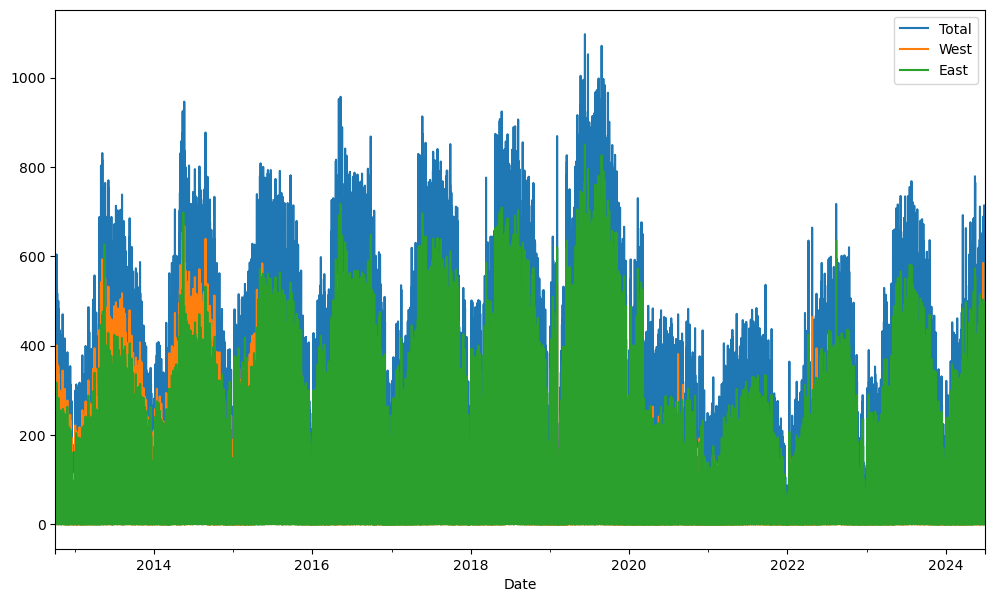

In [61]:
df.plot(figsize=(12,7)) 

The ~25,000 hourly samples are too dense to interpret easily.
We can gain more insight by resampling the data to a coarser grid.

### 5.1. Resampling

Resampling involves changing the frequency of a time series, either by aggregating data over larger intervals or by breaking it down into smaller ones.

Let's resample our data by day. 
Like the `groupby` method, `resample` requires an aggregation function to be useful. In this case, to find the daily count of bike trips across the bridge, we'll use the `sum` function.

In [63]:
# resample by day
df.resample('D').sum() # D = dayly

,Total,West,East
Date,,,
2012-10-02,1938.0,1165.0,773.0
2012-10-03,3521.0,1761.0,1760.0
2012-10-04,3475.0,1767.0,1708.0
2012-10-05,3148.0,1590.0,1558.0
2012-10-06,2006.0,926.0,1080.0
...,...,...,...
2024-06-26,3642.0,1255.0,2387.0
2024-06-27,2396.0,801.0,1595.0
2024-06-28,3145.0,1269.0,1876.0


<Axes: xlabel='Date'>

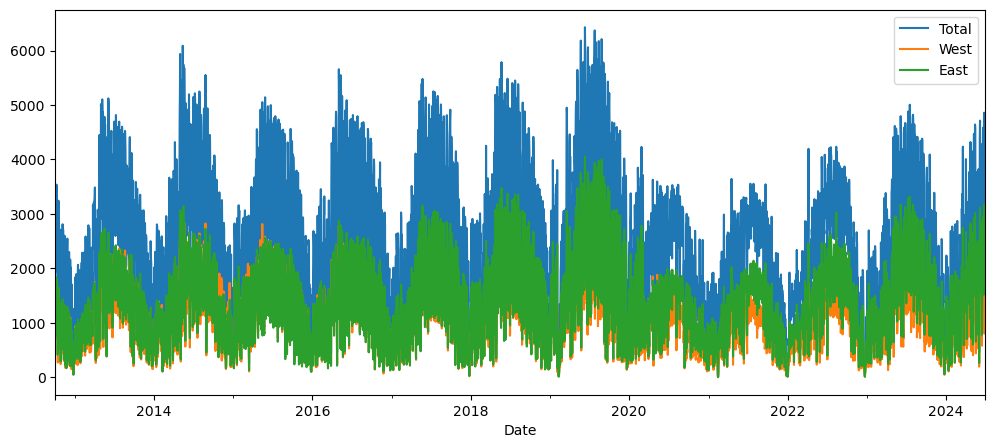

In [69]:
# resample and plot
df.resample('D').sum().plot(figsize = (12,5))

We can use other frequencies as well, such as weekly (W), monthly (ME), or yearly (YE).

<Axes: xlabel='Date'>

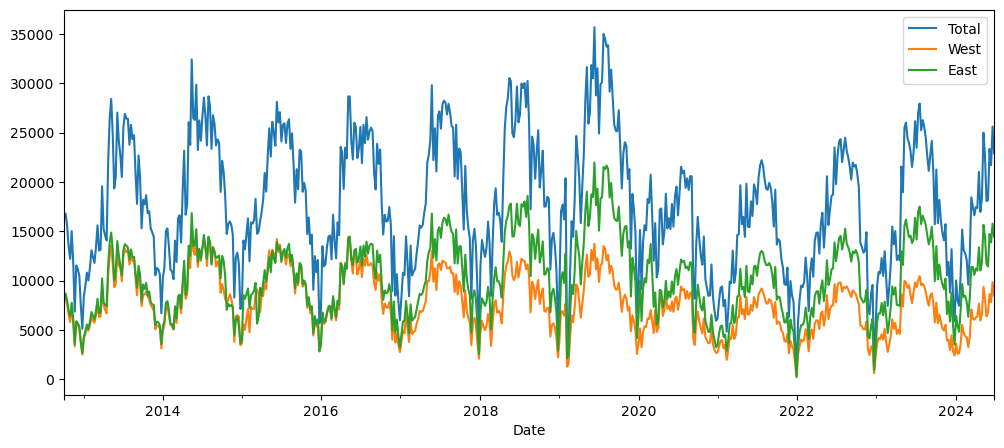

In [64]:
# resample by week
df.resample('W').sum().plot(figsize=(12,5)) # W : weekly

<Axes: xlabel='Date'>

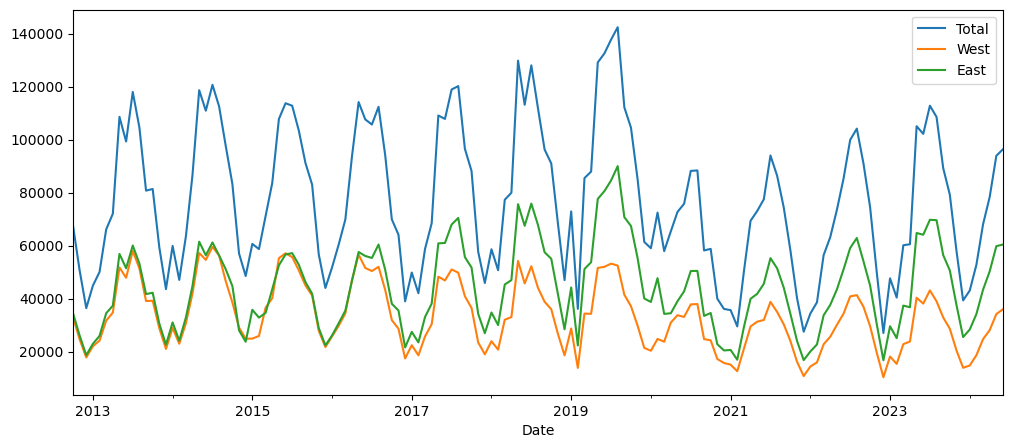

In [66]:
df.resample('ME').sum().plot(figsize=(12,5)) # monthly

The monthly plot reveals interesting seasonal trends: people bike more in the summer than in the winter.

<Axes: xlabel='Date'>

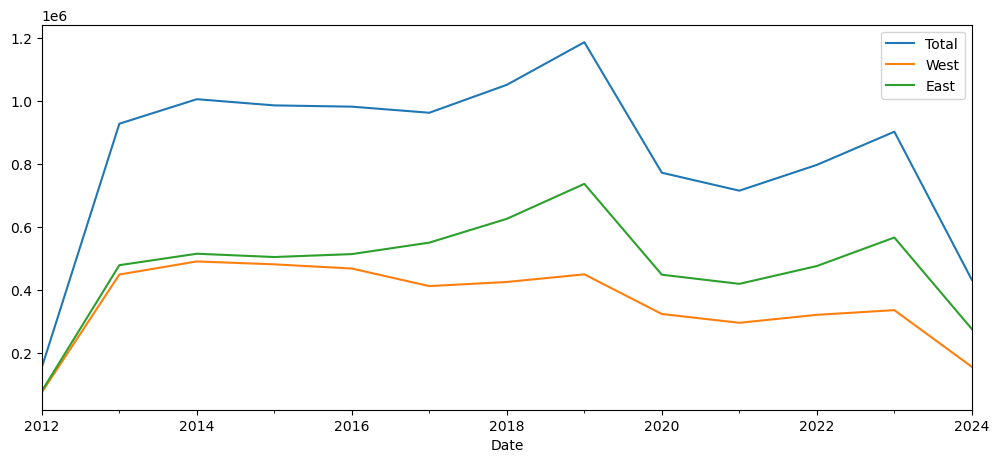

In [68]:
df.resample('YE').sum().plot(figsize=(12,5)) # yearly

### 5.2 Rolling

Rolling means, or moving averages, smooth out short-term fluctuations in time series data to highlight long-term trends.

Let's begin with the daily counts.

<Axes: xlabel='Date'>

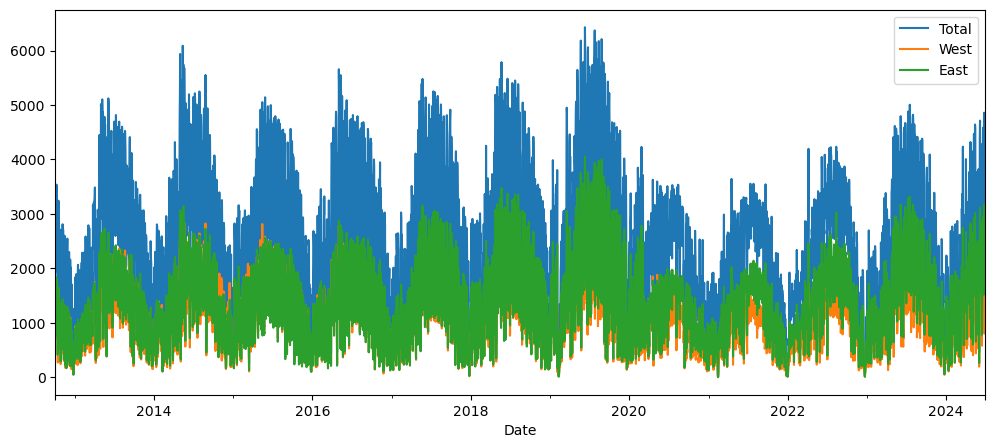

In [70]:
df.resample('D').sum().plot(figsize=(12,5)) 

The data is quite "spiky," with significant day-to-day fluctuations in bike trips across the Fremont Bridge, influenced by factors such as weather.

We can "smooth out" the data by calculating a moving average.

<Axes: xlabel='Date'>

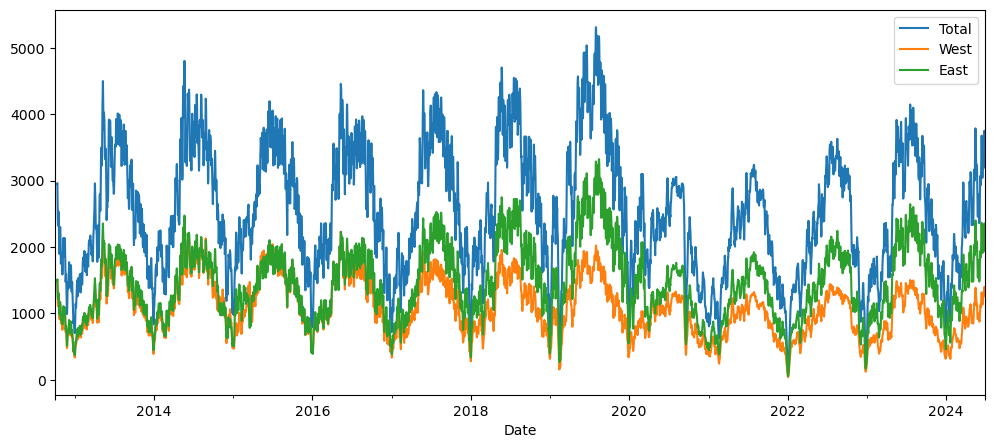

In [71]:
df.resample('D').sum().rolling(10).mean().plot(figsize=(12,5)) 

The `rolling(10)` method sets up a 10-day moving window to calculate the average number of bike trips. You can adjust the window size to be larger or smaller, depending on how smooth or detailed you want the average to be.

**Bonus: digging into the data**

Smoothed views help us see the overall trend but can mask interesting details.

Let’s plot the hourly counts for each day to explore the data more deeply.

In [73]:
table = df.pivot_table(values = 'Total', 
                       index=fremont.index.time, 
                       columns = fremont.index.date)
table

,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,...,2024-06-21,2024-06-22,2024-06-23,2024-06-24,2024-06-25,2024-06-26,2024-06-27,2024-06-28,2024-06-29,2024-06-30
00:00:00,NaN,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,...,13.0,41.0,34.0,4.0,3.0,9.0,3.0,5.0,21.0,27.0
01:00:00,NaN,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,...,7.0,18.0,23.0,7.0,5.0,6.0,4.0,3.0,12.0,11.0
02:00:00,NaN,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,...,1.0,10.0,0.0,5.0,4.0,4.0,2.0,3.0,8.0,8.0
03:00:00,NaN,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,...,8.0,5.0,3.0,2.0,0.0,1.0,3.0,4.0,6.0,1.0
04:00:00,NaN,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,...,11.0,3.0,7.0,10.0,17.0,13.0,17.0,9.0,5.0,4.0
05:00:00,NaN,31.0,26.0,25.0,5.0,9.0,23.0,31.0,25.0,12.0,...,25.0,16.0,7.0,31.0,41.0,40.0,31.0,21.0,8.0,9.0
06:00:00,NaN,155.0,142.0,105.0,27.0,17.0,137.0,153.0,149.0,43.0,...,90.0,43.0,23.0,105.0,137.0,117.0,90.0,76.0,38.0,17.0
07:00:00,NaN,352.0,319.0,319.0,33.0,26.0,327.0,368.0,340.0,304.0,...,185.0,49.0,38.0,218.0,332.0,296.0,198.0,150.0,59.0,33.0
08:00:00,NaN,437.0,418.0,370.0,105.0,69.0,457.0,462.0,435.0,404.0,...,283.0,113.0,59.0,359.0,523.0,414.0,272.0,241.0,86.0,85.0
09:00:00,NaN,276.0,241.0,212.0,114.0,103.0,278.0,275.0,255.0,189.0,...,206.0,146.0,97.0,208.0,302.0,269.0,195.0,199.0,135.0,117.0


Let us plot the data.
The `alpha` parameter controls the transparency of the plot lines. Setting alpha=0.1 makes the lines more transparent, which helps to visualize overlapping data.

<AxesSubplot:xlabel='time'>

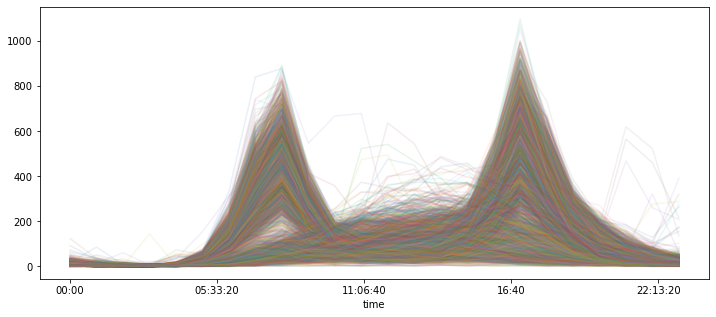

In [52]:
table.plot(legend=False,
           alpha=0.1, 
           figsize=(12,5))

We observe two distinct patterns: one trend peaks in the morning and evening, suggesting weekday behavior, while another peaks around noon, likely indicating weekend behavior. To verify this, let’s plot the average hourly bike counts by day of the week.

In [74]:
table = df.pivot_table(values = 'Total', 
                       index = fremont.index.time, 
                       columns = fremont.index.dayofweek)
table

Date,0,1,2,3,4,5,6
00:00:00,6.168301,7.510638,8.068515,8.670473,10.802610,15.920065,14.070147
01:00:00,3.151961,3.669394,4.101142,4.231648,5.425775,9.243067,8.256117
02:00:00,2.251634,2.744681,2.745514,2.972268,3.135400,5.969005,5.301165
03:00:00,1.964052,2.345336,2.461664,2.600326,2.574225,3.376835,2.964111
04:00:00,6.772876,7.540098,7.629690,7.448613,6.486134,3.861338,3.065253
05:00:00,28.075163,31.170213,30.427406,29.469821,25.115824,8.135400,5.675367
06:00:00,97.065359,114.635025,110.305057,102.892333,85.513866,19.236542,14.223491
07:00:00,243.939542,289.088380,280.951060,257.132137,212.156607,35.409462,28.269168
08:00:00,351.547386,399.278232,384.706362,365.050571,302.259380,65.892333,52.701468
09:00:00,194.647059,214.541735,216.539967,203.993475,181.310458,88.972268,79.386623


<Axes: xlabel='time'>

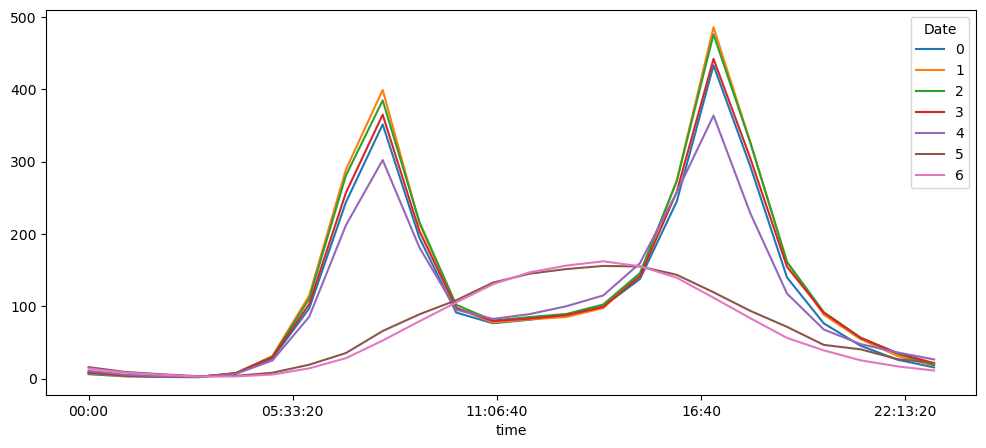

In [75]:
table.plot(figsize=(12,5))

This highlights a clear difference between weekday and weekend totals.

**Extra**: If you revisit the hourly plot, you might notice peaks around 10-11 PM on some days. Can you determine the cause of these peaks?

<Axes: xlabel='time'>

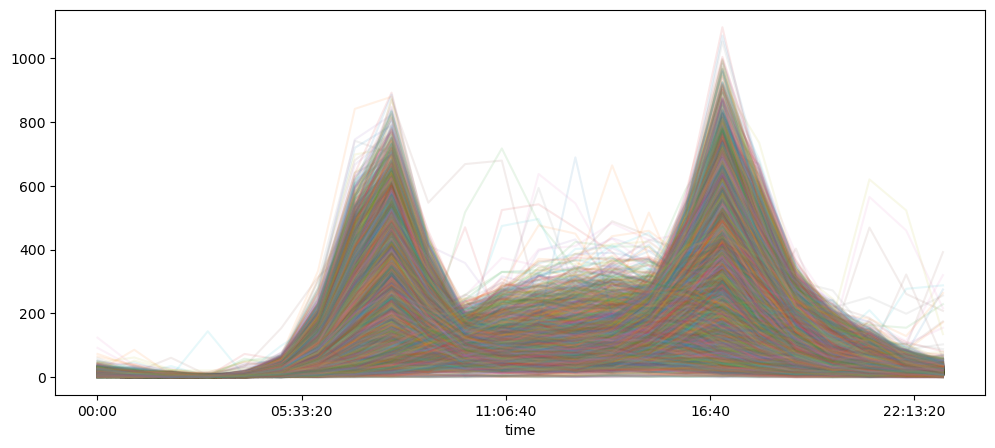

In [76]:
table = df.pivot_table(values = 'Total', 
                       index=fremont.index.time, 
                       columns = fremont.index.date)
table.plot(legend=False,
           alpha=0.1, 
           figsize=(12,5))